In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [13]:
df = pd.read_csv('mxmh_survey_results.csv')

In [14]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,10/30/2022 14:37,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
731,11/1/2022 22:26,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
732,11/3/2022 23:24,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
733,11/4/2022 17:31,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


Text(0.5, 0, 'BPM')

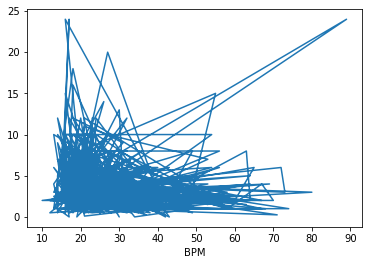

In [18]:
plt.plot(df['Age'], df['Hours per day'])
plt.xlabel('Hours per day')

In [19]:
df = df.sort_values(by='Age')

Text(0.5, 0, 'Hours per day')

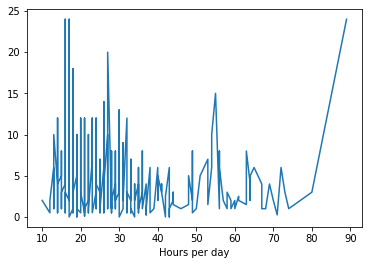

In [20]:
plt.plot(df['Age'], df['Hours per day'])
plt.xlabel('Hours per day')

In [21]:
df.groupby('Age').agg({'Hours per day': ['sum', 'median']})

Hours per day       
               sum median
Age                      
10.0           2.0   2.00
12.0           4.5   2.00
13.0          29.5   2.75
14.0          79.0   4.00
15.0          81.0   3.00
...            ...    ...
72.0           6.0   6.00
73.0           3.0   3.00
74.0           1.0   1.00
80.0           3.0   3.00
89.0          24.0  24.00

[61 rows x 2 columns]

In [76]:
ages_df = df.groupby('Age').agg({'Hours per day': ['sum', 'median'], 'BPM': ['sum', 'mean', 'median', 'count']})

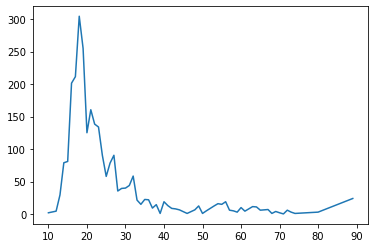

In [25]:
plt.plot(ages_df.index, ages_df['Hours per day', 'sum'])

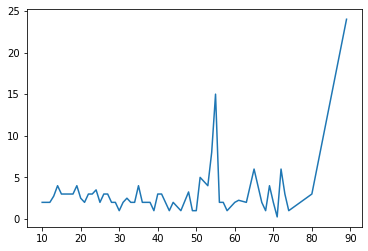

In [26]:
plt.plot(ages_df.index, ages_df['Hours per day', 'median'])

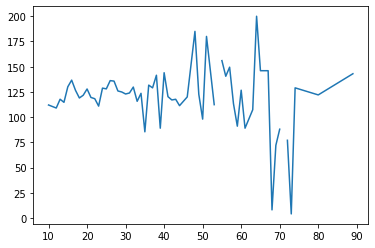

In [29]:
plt.plot(ages_df.index, ages_df['BPM', 'mean'])

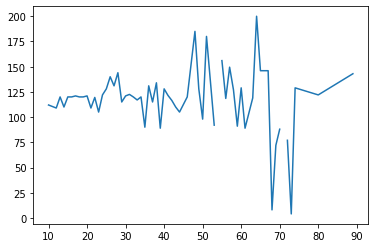

In [30]:
plt.plot(ages_df.index, ages_df['BPM', 'median'])

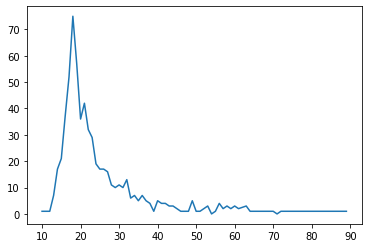

In [78]:
plt.plot(ages_df.index, ages_df['BPM', 'count'])

In [42]:
adi_df = df.groupby('Age').agg({'Anxiety': 'mean', 'Depression': 'mean', 'Insomnia': 'mean'})

In [43]:
adi_df

,Anxiety,Depression,Insomnia
Age,,,
10.0,8.000000,2.000000,1.000000
12.0,5.000000,2.666667,3.333333
13.0,7.000000,4.625000,4.500000
14.0,5.235294,3.705882,4.058824
15.0,6.571429,4.809524,4.142857
...,...,...,...
72.0,0.000000,1.000000,0.000000
73.0,5.000000,4.000000,0.000000
74.0,4.000000,2.000000,1.000000


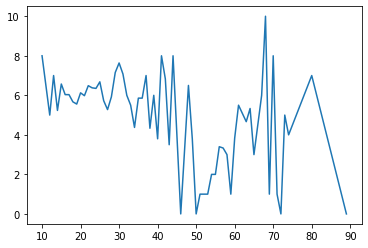

In [44]:
plt.plot(adi_df.index, adi_df['Anxiety'])

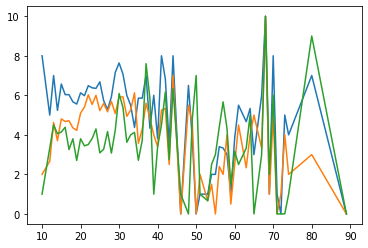

In [45]:
plt.plot(adi_df.index, adi_df['Anxiety'])
plt.plot(adi_df.index, adi_df['Depression'])
plt.plot(adi_df.index, adi_df['Insomnia'])

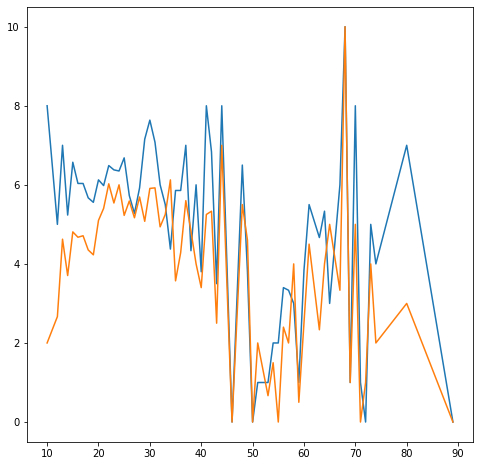

In [47]:
plt.figure(figsize=(8, 8))
plt.plot(adi_df.index, adi_df['Anxiety'])
plt.plot(adi_df.index, adi_df['Depression'])
# plt.plot(adi_df.index, adi_df['Insomnia'])

In [65]:
df['RoundedAge'] = df['Age'] // 5 * 5

adi_df = df.groupby('RoundedAge').agg({'Anxiety': 'mean', 'Depression': 'mean', 'Insomnia': 'mean'})
plt.figure(figsize=(10, 7))
plt.plot(adi_df.index, adi_df['Anxiety'], label='Anxiety')
plt.plot(adi_df.index, adi_df['Depression'], label='Depression')
plt.plot(adi_df.index, adi_df['Insomnia'], label='Insomnia')
plt.annotate(text=adi_df['Insomnia'].max(), xy=(adi_df.loc[ adi_df['Insomnia'] == adi_df['Insomnia'].max()].index[0], adi_df['Insomnia'].max()))
plt.legend()
plt.show()

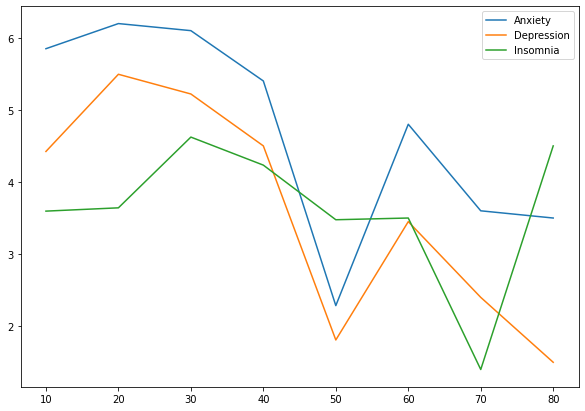

In [81]:
df['RoundedAge'] = df['Age'] // 10 * 10

adi_df = df.groupby('RoundedAge').agg({'Anxiety': 'mean', 'Depression': 'mean', 'Insomnia': 'mean'})
plt.figure(figsize=(10, 7))
plt.plot(adi_df.index, adi_df['Anxiety'], label='Anxiety')
plt.plot(adi_df.index, adi_df['Depression'], label='Depression')
plt.plot(adi_df.index, adi_df['Insomnia'], label='Insomnia')
# plt.annotate(text=adi_df['Insomnia'].max(), xy=(adi_df.loc[ adi_df['Insomnia'] == adi_df['Insomnia'].max()].index[0], adi_df['Insomnia'].max()))
plt.legend()
plt.show()

## Scatter plot

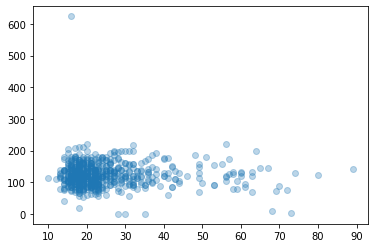

In [84]:
plt.scatter(df['Age'], df['BPM'], alpha=.3)

In [93]:
bpm_df = df.loc[(df['BPM'] < 300) & (df['BPM'] > 40)]

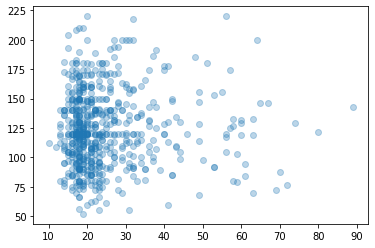

In [94]:
plt.scatter(bpm_df['Age'], bpm_df['BPM'], alpha=.3)

## Histogram

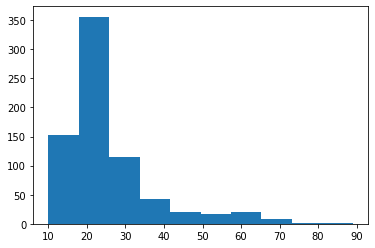

In [95]:
plt.hist(df['Age'])
plt.show()

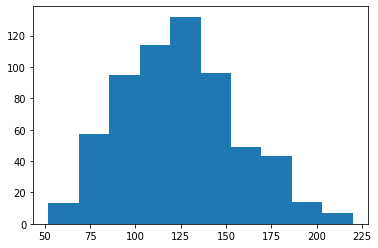

In [96]:
plt.hist(bpm_df['BPM'])
plt.show()

(array([266., 186., 100.,  30.,  20.,  11.,   3.,   1.,   0.,   3.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

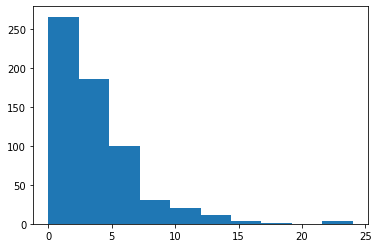

In [97]:
plt.hist(bpm_df['Hours per day'])

## Bar chart

<BarContainer object of 6 artists>

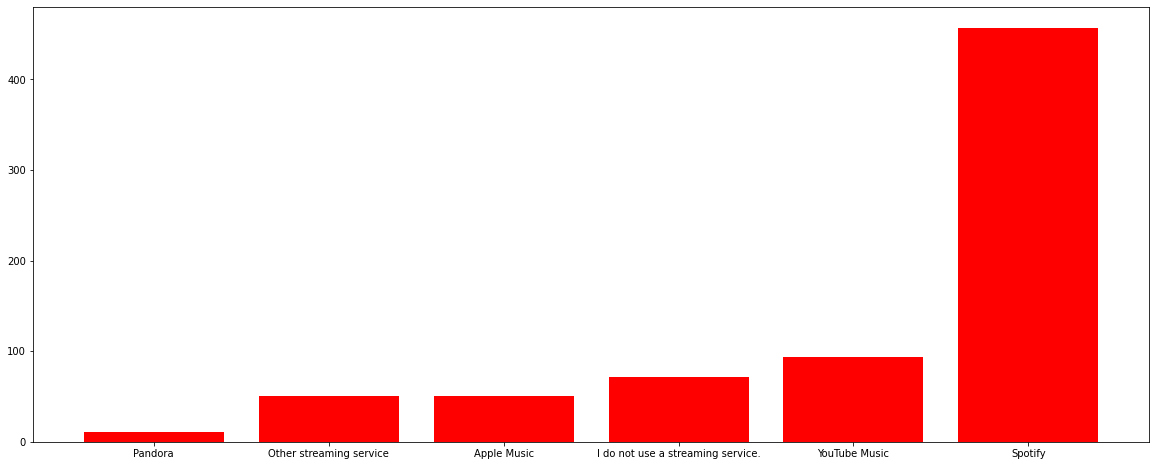

In [107]:
bar_df = df.groupby('Primary streaming service').agg({'Timestamp': 'count'}).sort_values(by='Timestamp')
plt.figure(figsize=(20, 8))
plt.bar(bar_df.index, height=bar_df['Timestamp'], color='red')

In [108]:
import matplotlib.colors as mcolors